In [1]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import ascii
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import Angle
Gaia.ROW_LIMIT = -1

In [22]:
from matplotlib import rcParams
rcParams['font.family'] = 'CMU Serif'
rcParams['mathtext.fontset'] = 'cm'
plt.rc('axes', unicode_minus=False)

In [3]:
coord = SkyCoord("01h33m50.8965749232s +30d39m36.630403128s", frame='icrs')
width = u.Quantity(10, u.arcmin)
height = u.Quantity(10, u.arcmin)
r = Gaia.query_object_async(coordinate=coord, width=width, height=height)

INFO: Query finished. [astroquery.utils.tap.core]


In [4]:
r

dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,solRad,solRad,solRad,solLum,solLum,solLum,,
float64,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,object
6.936115075062498e-06,1635721458409799680,Gaia DR2 303379863975504512,303379863975504512,1130804978,2015.5,23.462072211377286,0.8681637277920072,30.660178937676857,0.869345715411961,--,--,--,--,--,--,--,0.21097109,--,--,--,--,--,--,--,--,--,108,0,108,0,179.85352,84241.805,6.004233791997333,5130.5071496494475,3,False,0.027359575,--,--,0.048996035,13,9,1.8196189,0,13,False,114,40625.337161998264,257.3588596607142,157.85483,14.166373,13,30381.96973060214,279.15293530048694,108.83629,14.144849,12,44300.464777022615,126.2461580464162,350.90546,13.145899,1.8383216,0,0.99895,-0.02152443,1.0204744,--,--,0,--,--,--,NOT_AVAILABLE,133.61018988873795,-31.330677405709753,33.23573359583912,19.367927545939537,132001,5095.6333,4284.4497,6938.0,--,--,--,--,--,--,--,--,--,--,--,--,--,https://gea.esac.esa.int/data-server/datalink/links?ID=http%3A%2F%2Fgeadata.esac.esa.int%2Fdata-server%2Fdatalink%2Flinks%3FID%3D303379863975504512,
0.0007870461797053082,1635721458409799680,Gaia DR2 303379863975505152,303379863975505152,1438280298,2015.5,23.462371639926165,3.548711855542034,30.659429519535117,3.3852802990290685,--,--,--,--,--,--,--,0.07052571,--,--,--,--,--,--,--,--,--,71,0,68,3,45.488075,3186.1545,18.08683357206579,191.2362852018374,3,False,0.0028302728,--,

In [5]:
g_max = np.max(r['phot_g_mean_mag'])
g_min = np.min(r['phot_g_mean_mag'])

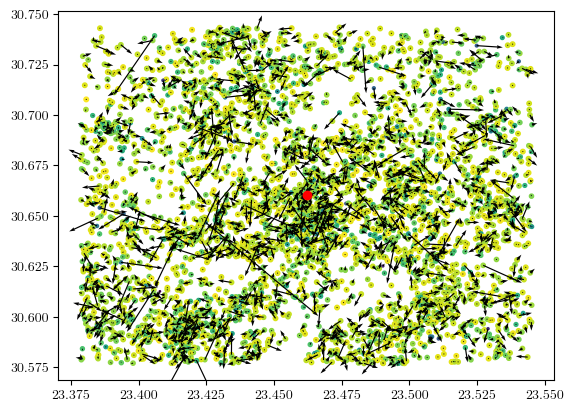

In [6]:
ra0 = Angle("01h33m50.8965749232s")
dec0 = Angle("+30d39m36.630403128s")
fig, ax = plt.subplots(1, 1)
ax.scatter(r['ra'], r['dec'], s=1+10*(r['phot_g_mean_mag'] - g_min)/(g_max - g_min), c=(r['phot_g_mean_mag'] - g_min)/(g_max - g_min))
#plt.quiver(np.array(r['ra'][mask]), np.array(r['dec'][mask]), np.array(r['pmra'][mask]), np.array(r['pmdec'][mask]))
ax.quiver(r['ra'].filled(0), r['dec'].filled(0), r['pmra'].filled(0), r['pmdec'].filled(0))
ax.scatter(ra0.to(u.deg), dec0, c='red')
fig.savefig("quiver.png", dpi=300)
plt.show()

In [7]:
r.sort('phot_g_mean_mag')
_100stars = r[:100]
_100stars

dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,solRad,solRad,solRad,solLum,solLum,solLum,,
float64,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,object
0.06663186149195359,1635721458409799680,Gaia DR2 303378180348360320,303378180348360320,1168982172,2015.5,23.407897936713603,0.04148174372756304,30.612567164619726,0.05268038170037755,0.40825626869134635,0.05902270103102457,6.9169364,-2.3972680869949454,0.09090655267841555,-3.3763230109323406,0.12076851481809808,0.33003578,0.14947224,-0.2425156,-0.20924443,-0.35580164,-0.4452097,-0.6528317,0.28048265,0.5968104,0.4869964,106,106,105,1,3.9507284,165.98686,0.0,0.0,31,True,286.91483,1.5035332778697554,0.012227681144072773,0.10184269,12,8,0.08246856,0,12,False,104,209605.28436080943,53.048067441464895,3951.2332,12.38486,12,84372.66904282814,121.60094700498146,693.84875,13.035884,12,179852.7017697542,227.64548599591214,790.0561,11.624627,1.2605854,0,1.4112568,0.65102386,0.7602329,6.814166865936539,0.48630066317383275,5,5000.0,3.0,0.0,NOT_AVAILABLE,133.56727686347836,-31.386326148325857,33.170654113779335,19.342053254973884,100001,4799.0,4545.99,4892.3335,--,--,--,--,--,--,200111,10.982089,10.567064,12.238536,57.632526,46.63259,68.63246,https://gea.esac.esa.int/data-server/datalink/links?ID=http%3A%2F%2Fgeadata.esac.esa.int%2Fdata-server%2Fdatalink%2Flinks%3FID%3D303378180348360320,
0.013965598860813614,1635721458409799680,Gaia DR2 3033798983352

In [8]:
from astroquery.vizier import Vizier
Vizier.ROW_LIMIT = -1
cat_names = ['2MASS', 'MSX', 'WISE', 'PanStarrs']
cats = []
for i in range(len(cat_names)):
    cats.append(Vizier.query_region(coord, radius=10*np.sqrt(2)*u.arcmin, catalog=cat_names[i])[0].meta["name"])

In [9]:
cats[1]

'V/114/msx6_main'

In [10]:
from astroquery.xmatch import XMatch
match1 = XMatch.query(cat1=r, cat2=f'vizier:{cats[0]}', max_distance=2 * u.arcsec, colRA1='ra', colDec1='dec')
match1

Could not import regions, which is required for some of the functionalities of this module.


angDist,dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,2MASS,RAJ2000,DEJ2000,errHalfMaj,errHalfMin,errPosAng,Jmag,Hmag,Kmag,e_Jmag,e_Hmag,e_Kmag,Qfl,Rfl,X,MeasureJD
float64,float64,int64,str27,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,str5,float64,float64,float64,float64,int64,int64,float64,int64,int64,str5,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,str13,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,str147,int64,str16,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,str3,int64,int64,float64
0.050632,0.06663186149195359,1635721458409799680,Gaia DR2 303378180348360320,303378180348360320,1168982172,2015.5,23.407897936713603,0.04148174372756304,30.612567164619726,0.05268038170037755,0.40825626869134635,0.05902270103102457,6.91693639755249,-2.3972680869949454,0.09090655267841555,-3.3763230109323406,0.12076851481809808,0.3300357758998871,0.14947223663330078,-0.24251559376716614,-0.20924443006515503,-0.35580164194107056,-0.44520971179008484,-0.6528316736221313,0.2804826498031616,0.5968104004859924,0.4869964122772217,106,106,105,1,3.950728416442871,165.9868621826172,0.0,0.0,31,true,286.9148254394531,1.5035332778697554,0.012227681144072773,0.10184268653392792,12,8,0.08246856182813644,0,12,false,104,209605.28436080943,53.048067441464895,3951.233154296875,12.384860038757324,12,84372.66904282814,121.60094700498146,693.8487548828125,13.035883903503418,12,179852.7017697542,227.64548599591214,790.0560913085938,11.624627113342285,1.2605854272842407,0,1.4112567901611328,0.6510238647460938,0.7602329254150391,6.814166865936539,0.48630066317383275,5,5000.0,3.0,0.0,NOT_AVAILABLE,133.56727686347836,-31.386326148325857,33.170654113779335,19.342053254973884,100001,4799.0,4545.990234375,4892.33349609375,--,--,--,--,--,--,200111,10.982089042663574,10.56706428527832,12.23853588104248,57.63252639770508,46.632591247558594,68.63246154785156,https://gea.esac.esa.int/data-ser

In [11]:
match2 = XMatch.query(cat1=match1, cat2=f'vizier:{cats[1]}', max_distance=10 * u.arcsec, colRA1='ra', colDec1='dec')
match2

angDist_1,angDist_2,dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,2MASS,RAJ2000_1,DEJ2000_1,errHalfMaj,errHalfMin,errPosAng,Jmag,Hmag,Kmag,e_Jmag,e_Hmag,e_Kmag,Qfl,Rfl,X,MeasureJD,_RAJ2000,_DEJ2000,MSX6C,RAJ2000_2,DEJ2000_2,ePos,B1,q_B1,B2,q_B2,A,q_A,C,q_C,D,q_D,E,q_E
float64,float64,float64,int64,str27,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,str5,float64,float64,float64,float64,int64,int64,float64,int64,int64,str5,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,str13,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,str147,int64,str16,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,str3,int64,int64,float64,float64,float64,str17,float64,float64,float64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64
6.528905,0.165428,0.06700121938379207,1635721458409799680,Gaia DR2 303380207572866176,303380207572866176,63734864,2015.5,23.52749868783631,0.06087091927083247,30.696555755337958,0.05236213239996887,-0.03308374836168558,0.06336838082046817,-0.5220860838890076,0.09890574536314446,0.13779775830551325,-0.04954072360323162,0.10226312000320303,0.068391352891922,0.15374153852462769,-0.19697193801403046,0.10227104276418686,0.08263581246137619,0.11076690256595612,0.2982201874256134,-0.06257171928882599,0.16955487430095673,0.09933684766292572,114,0,114,0,0.8749752640724182,121.71699523925781,0.1288513468220353,0.7001578655609911,31,true,6.628149032592773,1.7134949602101088,0.016428618353346715,-0.06960320472717285,13,9,0.13040556013584137,0,13,false,114,7140.149030042388,24.71247526173588,288.9289245605469,16.05409812927246,12,5417.841832310018,58.42902419718521,92.72518157958984,16.016822814941406,12,4571.022523030823,37.566602176977035,121.67782592773438,15.611886978149414,1.398971438407898,0,0.4049358367919922,-0.03727531433105469,0.4422111511230469,--,--,0,--,--,--,NOT_AVAILABLE,133.66663567024835,-31.284161502377987,33.305651879478305,19.3797151861181,112001

In [12]:
match3 = XMatch.query(cat1=match2, cat2=f'vizier:{cats[3]}', max_distance=0.5 * u.arcsec, colRA1='ra', colDec1='dec')
match3

angDist,angDist_1,angDist_2,dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,2MASS,RAJ2000_1,DEJ2000_1,errHalfMaj_1,errHalfMin_1,errPosAng_1,Jmag,Hmag,Kmag,e_Jmag,e_Hmag,e_Kmag,Qfl,Rfl,X,MeasureJD,_RAJ2000,_DEJ2000,MSX6C,RAJ2000_2,DEJ2000_2,ePos,B1,q_B1,B2,q_B2,A,q_A,C,q_C,D,q_D,E,q_E,objID,RAJ2000,DEJ2000,errHalfMaj_2,errHalfMin_2,errPosAng_2,f_objID,Qual,Epoch,Ns,Nd,gmag,e_gmag,gKmag,e_gKmag,gFlags,rmag,e_rmag,rKmag,e_rKmag,rFlags,imag,e_imag,iKmag,e_iKmag,iFlags,zmag,e_zmag,zKmag,e_zKmag,zFlags,ymag,e_ymag,yKmag,e_yKmag,yFlags
float64,float64,float64,float64,int64,str27,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,str5,float64,float64,float64,float64,int64,int64,float64,int64,int64,str5,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,str13,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,str147,int64,str16,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,str3,int64,int64,float64,float64,float64,str17,float64,float64,float64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,int64,float64,float64,float64,float64,int64,int64,int64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64
0.004575,6.528905,0.165428,0.06700121938379207,1635721458409799680,Gaia DR2 303380207572866176,303380207572866176,63734864,2015.5,23.52749868783631,0.06087091927083247,30.696555755337958,0.05236213239996887,-0.03308374836168558,0.06336838082046817,-0.5220860838890076,0.09890574536314446,0.13779775830551325,-0.04954072360323162,0.10226312000320303,0.068391352891922,0.15374153852462769,-0.19697193801403046,0.10227104276418686,0.08263581246137619,0.11076690256595612,0.2982201874256134,-0.06257171928882599,0.16955487430095673,0.09933684766292572,114,0,114,0,0.8749752640724182,121.71699523925781,0.1288513468220353,0.70015786556099

In [13]:
from astropy.table import QTable
fin_tab = QTable([match3['DESIGNATION'], match3['ra'], match3['dec']], names=('name', 'ra', 'dec'))

In [20]:
wav = np.array([0.622, 1.235, 1.662, 2.159, 4.29, 4.35, 7.76, 11.99, 14.55, 20.68, 0.4866, 0.6215, 0.7545, 0.8679, 0.9633]) * u.um
wav_nam = np.array(['G', 'J', 'H', 'K', 'B1', 'B2', 'A', 'C', 'D', 'E', 'g', 'r', 'i', 'z', 'y'])
fin_tab['F_G'] = 3229*10**(-0.4*match3['phot_g_mean_mag']) * u.Jy; fin_tab['eF_G'] = 0 * u.Jy
fin_tab['F_J'] = 1594*10**(-0.4*match3['Jmag']) * u.Jy; fin_tab['eF_J'] = 0.4*fin_tab['F_J']*match3['e_Jmag']
fin_tab['F_H'] = 1024*10**(-0.4*match3['Hmag']) * u.Jy; fin_tab['eF_H'] = 0.4*fin_tab['F_H']*match3['e_Hmag']
fin_tab['F_K'] = 666.7*10**(-0.4*match3['Kmag']) * u.Jy; fin_tab['eF_K'] = 0.4*fin_tab['F_K']*match3['e_Kmag']
fin_tab['F_B1'] = match3['B1'] * u.Jy; fin_tab['eF_B1'] = match3['q_B1'] * match3['B1']/100 * u.Jy
fin_tab['F_B2'] = match3['B2'] * u.Jy; fin_tab['eF_B2'] = match3['q_B2'] * match3['B2']/100 * u.Jy
fin_tab['F_A'] = match3['A'] * u.Jy; fin_tab['eF_A'] = match3['q_A'] * match3['A']/100 * u.Jy
fin_tab['F_C'] = match3['C'] * u.Jy; fin_tab['eF_C'] = match3['q_C'] * match3['C']/100 * u.Jy
fin_tab['F_D'] = match3['D'] * u.Jy; fin_tab['eF_D'] = match3['q_D'] * match3['D']/100 * u.Jy
fin_tab['F_E'] = match3['E'] * u.Jy; fin_tab['eF_E'] = match3['q_E'] * match3['E']/100 * u.Jy
fin_tab['F_g'] = 3631*10**(-0.4*match3['gmag']) * u.Jy; fin_tab['eF_g'] = 0.4*fin_tab['F_g']*match3['e_gmag']
fin_tab['F_r'] = 3631*10**(-0.4*match3['rmag']) * u.Jy; fin_tab['eF_r'] = 0.4*fin_tab['F_r']*match3['e_rmag']
fin_tab['F_i'] = 3631*10**(-0.4*match3['imag']) * u.Jy; fin_tab['eF_i'] = 0.4*fin_tab['F_i']*match3['e_imag']
fin_tab['F_z'] = 3631*10**(-0.4*match3['zmag']) * u.Jy; fin_tab['eF_z'] = 0.4*fin_tab['F_z']*match3['e_zmag']
fin_tab['F_y'] = 3631*10**(-0.4*match3['ymag']) * u.Jy; fin_tab['eF_y'] = 0.4*fin_tab['F_y']*match3['e_ymag']

In [24]:
for io in range(len(fin_tab)):
    fig1, ax1 = plt.subplots(1, 1)
    sed = np.array([fin_tab[f'F_{nam}'][io].value for nam in wav_nam])
    e_sed = np.array([fin_tab[f'eF_{nam}'][io].value for nam in wav_nam])
    ax1.errorbar(wav, sed, yerr=e_sed, fmt='o')
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    fig1.savefig(f'seds/{io:05d}.png', bbox_inches='tight', dpi=300)
    plt.close(fig=fig1)

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 